# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

# Importing Libraires 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from scipy.io import loadmat
from tabulate import tabulate
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

In [3]:
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019', '__version__': '1.0', '__globals__': [], 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
         -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
        [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
         -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
        [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
          2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
        ...,
        [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
         -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
        [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
         -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
        [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
         -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],

       [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ...,
         -2.43

# Exploratory Data Analysis

In [4]:
# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Assigning Variables</h2>
    
</div>


In [5]:
eeg_samples = mat_data['EEGsample']
subindex = mat_data['subindex']
substates = mat_data['substate']

### Calculate the duration of each sample in seconds

EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels. "subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample. "substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

In [6]:
# Calculate the duration of each sample in seconds
sampling_rate = 128  # Hz

num_samples, num_channels, num_time_points = eeg_samples.shape
sample_duration = num_time_points / sampling_rate

### Check for missing values

In [7]:
missing_values = np.isnan(eeg_samples).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

No missing values in the EEG data.


In [8]:
print("Number of subjects:", len(np.unique(subindex)))
print("EEGsample shape:", eeg_samples.shape)
print("Number of Samples:", num_samples)
print("Number of Channels:", num_channels)
print("Number of Time Points:", num_time_points)
print("Sample Duration (seconds):", sample_duration)

unique_labels, label_counts = np.unique(substates, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts)

Number of subjects: 11
EEGsample shape: (2022, 30, 384)
Number of Samples: 2022
Number of Channels: 30
Number of Time Points: 384
Sample Duration (seconds): 3.0
Unique labels: [0 1]
Label counts: [1011 1011]


#### The initial exploration of the EEG dataset reveals the following details:

#### EEG Samples (EEGsample):

  * The dataset contains 2022 EEG samples.
  * Each EEG sample is from 30 channels.
  * Each channel has 384 data points, corresponding to a 3-second EEG recording at a sampling rate of 128Hz.

#### Subject States (substate):

  * There are two unique states: 0 representing the alert state and 1 representing the drowsy state.
  * Each state has 1011 samples, indicating a balanced dataset with respect to the two states.

#### Subject Indexes (subindex):

  * There are 11 unique subjects in the dataset (labeled 1 to 11).
  * The distribution of samples across subjects varies, ranging from a minimum of 102 samples to a maximum of 314 samples per subject.

## State-specific Analysis: 'Alert' and 'Drowsy'

In [9]:
substates_flat = substates.flatten()

In [10]:
# Calculating means and standard deviations for each channel in both states

#Alert States
mean_alert = np.mean(eeg_samples[substates_flat == 0], axis=(0, 2))
std_alert = np.std(eeg_samples[substates_flat == 0], axis=(0, 2))

#Drowsy States
mean_drowsy = np.mean(eeg_samples[substates_flat == 1], axis=(0, 2))
std_drowsy = np.std(eeg_samples[substates_flat == 1], axis=(0, 2))

In [11]:
# Creating a DataFrame for easy viewing
stats_df = pd.DataFrame({
    'Channel': range(1, 31),
    'Mean_Alert': mean_alert,
    'Std_Alert': std_alert,
    'Mean_Drowsy': mean_drowsy,
    'Std_Drowsy': std_drowsy
})

In [12]:
stats_df  

,Channel,Mean_Alert,Std_Alert,Mean_Drowsy,Std_Drowsy
0,1,0.120450,17.630071,-0.163686,10.802148
1,2,0.082160,17.209800,-0.163763,12.170468
2,3,0.052289,9.635932,-0.061430,9.706984
3,4,0.002035,30.798487,-0.113082,11.617223
4,5,0.022715,9.642534,-0.159155,11.707889
5,6,0.021788,26.476227,-0.154311,17.197473
6,7,0.019232,12.678096,-0.126242,9.635353
7,8,0.046900,8.752803,-0.070030,9.094665
8,9,0.023307,9.758593,-0.130595,11.230886
9,10,0.017935,9.891951,-0.138523,12.140691


## EEG Channel Statistics Across Subjects and Timepoints

In [13]:
# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Create a list of dictionaries for each channel's statistics
channel_stats = [
    {
        "Channel": channel_index + 1,
        "Mean": f"{mean_values[channel_index]:.4f}",
        "Std Dev": f"{std_values[channel_index]:.4f}",
        "Min": f"{min_values[channel_index]:.4f}",
        "Max": f"{max_values[channel_index]:.4f}"
    }
    for channel_index in range(num_channels)
]

In [14]:
# Printing the table
print("Basic Statistics for EEG Channels")
print(tabulate(channel_stats, headers="keys", tablefmt="grid"))

Basic Statistics for EEG Channels
+-----------+---------+-----------+-----------+----------+
|   Channel |    Mean |   Std Dev |       Min |      Max |
+===========+=========+===========+===========+==========+
|         1 | -0.0216 |   14.621  |  -573.236 |  871.908 |
+-----------+---------+-----------+-----------+----------+
|         2 | -0.0408 |   14.9052 | -1299.32  |  911.153 |
+-----------+---------+-----------+-----------+----------+
|         3 | -0.0046 |    9.6717 |  -208.161 |  243.286 |
+-----------+---------+-----------+-----------+----------+
|         4 | -0.0555 |   23.2757 | -1302.31  | 1795.54  |
+-----------+---------+-----------+-----------+----------+
|         5 | -0.0682 |   10.7254 |  -259.186 |  157.868 |
+-----------+---------+-----------+-----------+----------+
|         6 | -0.0663 |   22.3244 | -1914.6   | 1294.24  |
+-----------+---------+-----------+-----------+----------+
|         7 | -0.0535 |   11.2602 |  -496.507 |  754.21  |
+-----------+---------

# Segregating Subject 1

In [15]:
import scipy.io

# Segregate the data for Subject 1
subject1_data = mat_data['EEGsample'][mat_data['subindex'][:, 0] == 1, :]
subject1_labels = mat_data['substate'][mat_data['subindex'][:, 0] == 1]

In [16]:
# Save the segregated data as a new dataset
new_data = {'EEGsample': subject1_data, 'substate': subject1_labels, 'subindex': np.ones((np.sum(mat_data['subindex'][:, 0] == 1), 1))}
scipy.io.savemat('subject1_dataset.mat', new_data)

# Segregate the data into alert and drowsy states

In [19]:
import scipy.io

# Load the dataset for Subject 1
subject1_data = scipy.io.loadmat('subject1_dataset.mat')

# Segregate the data into alert and drowsy states
alert_data = subject1_data['EEGsample'][subject1_data['substate'][:, 0] == 0, :]
drowsy_data = subject1_data['EEGsample'][subject1_data['substate'][:, 0] == 1, :]

# Save the segregated data as new datasets
scipy.io.savemat('alert_data.mat', {'EEGsample': alert_data})
scipy.io.savemat('drowsy_data.mat', {'EEGsample': drowsy_data})

In [22]:
eeg_samples = alert_data['EEGsample']
print("EEGsample shape:", eeg_samples.shape)

EEGsample shape: (94, 30, 384)


In [26]:
import numpy as np
import pandas as pd
import scipy.io

# Load the alert data
alert_data = scipy.io.loadmat('alert_data.mat')

# Transpose the EEGsample for each sample
transposed_EEG = np.transpose(alert_data['EEGsample'], (0, 2, 1))

In [27]:
transposed_EEG.shape

(94, 384, 30)

In [30]:
# Concatenate all the samples together
concatenated_EEG = np.concatenate(transposed_EEG, axis=0)

In [31]:
concatenated_EEG.shape

(36096, 30)

In [32]:
import pandas as pd

# Create a new dataframe with the concatenated EEG values
df = pd.DataFrame(concatenated_EEG)

# Save the new dataframe as a CSV file
df.to_csv('concatenated_EEG.csv', index=False)

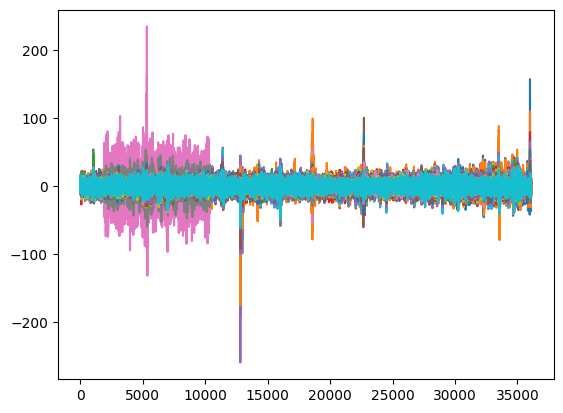

In [33]:
import matplotlib.pyplot as plt

# Plot the entire column of the concatenated EEG data
plt.plot(concatenated_EEG)

# Show the plot
plt.show()

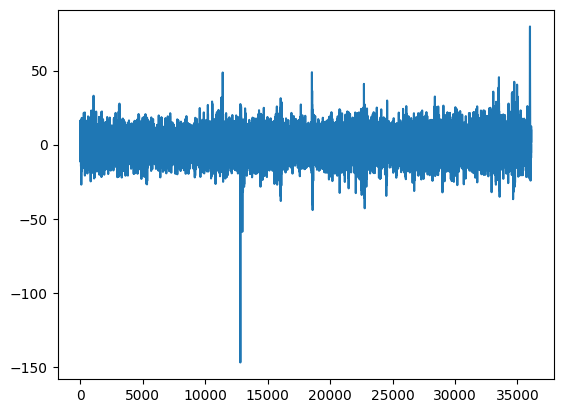

In [37]:
import matplotlib.pyplot as plt

# Select the column to plot
column_to_plot = 3

# Plot the selected column of the concatenated EEG data
plt.plot(concatenated_EEG[:, column_to_plot])

# Show the plot
plt.show()